In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=e243b3cb10bb07ebbc1c614a987d4b73605f779aa18c868338d6bd95251e6d3b
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [2]:
import numpy as np
from pyod.models.knn import KNN   # You can choose any PyOD model for anomaly detection
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

In [3]:
X_train, _ = generate_data(n_train=200, train_only=True, n_features=2)

In [4]:
clf = KNN(contamination=0.1)

In [5]:
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [6]:
y_train_scores = clf.decision_scores_

In [8]:
y_train_pred = clf.labels_

In [9]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Feature 2')

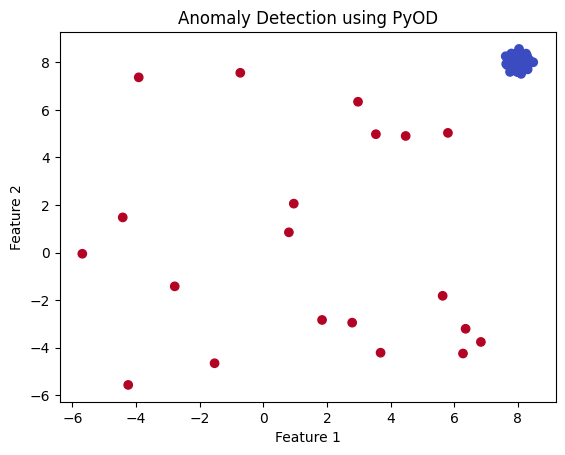

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', label='Data points')
plt.title('Anomaly Detection using PyOD')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

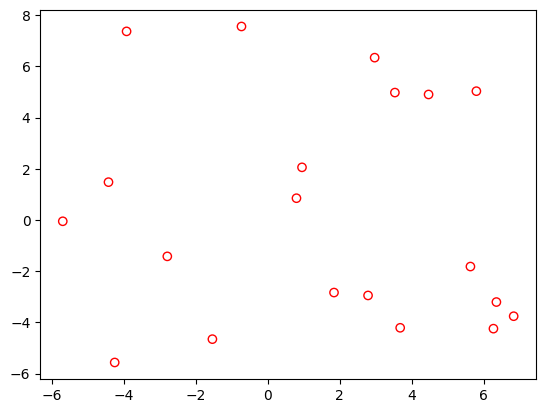

In [11]:
outliers = X_train[y_train_pred == 1]
plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='r', facecolors='none', label='Detected anomalies')